## Import Libraries 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

#### Read Files

In [2]:
landuse_gdf = gpd.read_file('../data/raw/landuse_df.gpkg')
natural_gdf = gpd.read_file('../data/raw/natural_df.gpkg')
pofw_gdf = gpd.read_file('../data/raw/pofw_df.gpkg')
pois_gdf = gpd.read_file('../data/raw/pois_df.gpkg')
roads_gdf = gpd.read_file('../data/raw/roads_df.gpkg')

In [3]:
landuse_gdf.head()

,fclass,GAZLOC,geometry
0,park,GLEN WAVERLEY,"MULTIPOLYGON (((145.14888 -37.87904, 145.14899..."
1,park,GLEN WAVERLEY,"MULTIPOLYGON (((145.14631 -37.88405, 145.14649..."
2,forest,GLEN WAVERLEY,"MULTIPOLYGON (((145.14631 -37.88405, 145.14649..."
3,park,GLEN WAVERLEY,"MULTIPOLYGON (((145.14971 -37.88515, 145.15003..."
4,park,GLEN WAVERLEY,"MULTIPOLYGON (((145.15571 -37.88091, 145.15578..."


-----

## Visualisations

#### Map Visualisations

/var/folders/03/crp2bz8918l1tgr0vbt4jgfh0000gn/T/ipykernel_98550/2022901307.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Land Use Class', loc='upper right')
/var/folders/03/crp2bz8918l1tgr0vbt4jgfh0000gn/T/ipykernel_98550/2022901307.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Land Use Class', loc='upper right')


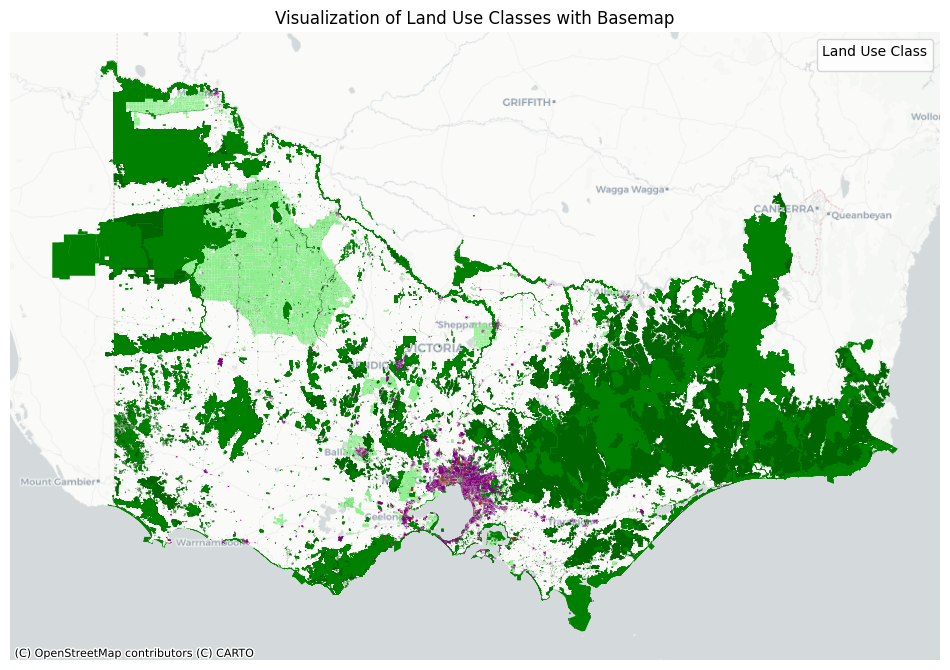

In [11]:
# Define the list of fclass features to include
include_features = ['commercial areas', 'farmland', 'forest', 'industrial areas',
                    'nature_reserve', 'park', 'residential areas', 'retail areas']

# Filter the GeoDataFrame to include only the specified features
filtered_gdf = landuse_gdf[landuse_gdf['fclass'].isin(include_features)]

# Define a color mapping for the specified fclass features
color_mapping = {
    'commercial areas': 'grey',
    'farmland': 'lightgreen',
    'forest': 'darkgreen',
    'industrial areas': 'brown',
    'nature_reserve': 'green',
    'park': 'green',
    'residential areas': 'purple',
    'retail areas': 'red'
}

# Convert the CRS to Web Mercator for compatibility with contextily basemaps
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each feature with its corresponding color
for fclass, color in color_mapping.items():
    subset = filtered_gdf[filtered_gdf['fclass'] == fclass]
    subset.plot(ax=ax, color=color, label=fclass)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Add legend and title
plt.legend(title='Land Use Class', loc='upper right')
plt.title('Visualization of Land Use Classes with Basemap')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()


#### Mode Visualisations